In [2]:
from sklearn.model_selection import permutation_test_score
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from matplotlib import pyplot as plt
import numpy as np
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X, y = make_classification(n_samples=500, n_features=20, n_informative=15, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Instanciar un modelo
clf = LogisticRegression()

# Realizar el test de permutación
score, permutation_scores, pvalue = permutation_test_score(
    clf, X_train, y_train, scoring="accuracy", n_permutations=300, random_state=42
)

print(f"Precisión del modelo: {score}")
print(f"P-value: {pvalue}")


Precisión del modelo: 0.8714285714285716
P-value: 0.0033222591362126247


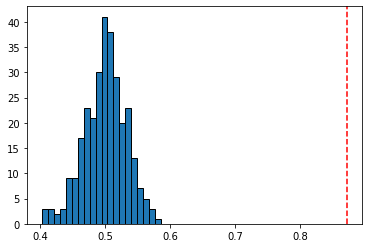

In [3]:
plt.hist(permutation_scores, bins=20, edgecolor='black')
plt.axvline(score, linestyle='--', color='red')
plt.show()


Desarrollamos la idea manualmente para verificar

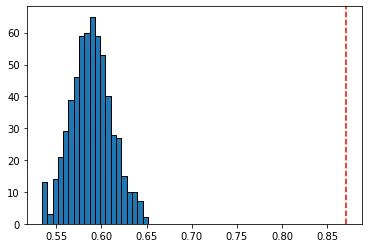

Precisión del modelo: 0.8714285714285716
P-value: 0.0033222591362126247


In [5]:
clf.fit(X_train, y_train)
original_score = clf.score(X_train, y_train)

for i in range(300):
    y_permuted = y_train.copy()
    np.random.shuffle(y_permuted)
    clf.fit(X_train, y_permuted)
    permutation_scores.append(clf.score(X_train, y_permuted))
plt.hist(permutation_scores, bins=20, edgecolor='black')
plt.axvline(score, linestyle='--', color='red')
plt.show()

permutation_scores = np.array(permutation_scores)
p_value = np.mean(permutation_scores >= original_score)
print(f"Precisión del modelo: {score}")
print(f"P-value: {pvalue}")

Si usamos las medias puede ser incluso mejor pero computacionalmente mas caro

In [10]:
# Paso 4: Realizar permutaciones en la variable objetivo y calcular la precisión promedio de varias ejecuciones
n_permutations = 300  # Número de permutaciones
n_runs_per_permutation = 20  # Número de ejecuciones por permutación
permutation_scores = np.zeros(n_permutations)

for i in range(n_permutations):
    # Permutar aleatoriamente los valores de la variable objetivo de entrenamiento
    y_train_permuted = np.random.permutation(y_train)
    
    scores = []
    for _ in range(n_runs_per_permutation):
        # Entrenar el modelo con la variable objetivo permutada
        clf.fit(X_train, y_train_permuted)
        scores.append(accuracy_score(y_test, clf.predict(X_test)))
    
    # Promediar los resultados de varias ejecuciones
    permutation_scores[i] = np.mean(scores)


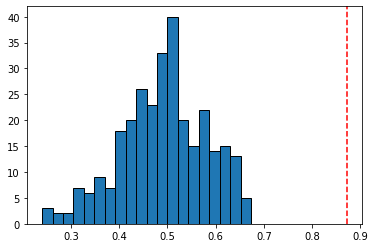

Precisión del modelo: 0.8714285714285716
Valor p: 0.0
Promedio de las precisiones de permutación: 0.4934666666666667


In [11]:
plt.hist(permutation_scores, bins=20, edgecolor='black')
plt.axvline(score, linestyle='--', color='red')
plt.show()

print(f"Precisión del modelo: {score}")
# Paso 5: Calcular el valor p
p_value = np.mean(permutation_scores >= score)
print(f'Valor p: {p_value}')
# Paso 6: Mostrar resultados
print(f'Promedio de las precisiones de permutación: {np.mean(permutation_scores)}')